## **Image Processing Assignment 1**

### **Part 1**

In [5]:
# importing the required libraries
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
import numpy as np
import cv2

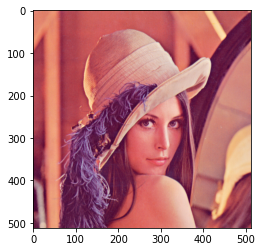

In [6]:
# reading the colored image of the lenna.png and showing the image
img = Image.open(r"PA1_Images\Lenna.png")
plt.imshow(img)

In [7]:
# definning the PSNR function
def PSNR(img1,img2):
    R2 = np.amax(img1)**2
    MSE = np.sum(np.power(np.subtract(img1,img2),2))
    MSE /= (img1.size[0]*img1.size[1])
    Psnr = 10*np.log10(R2/MSE)
    return Psnr

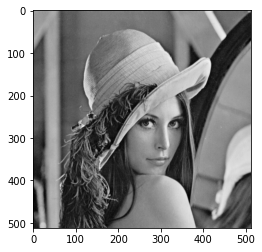

In [8]:
# 1. converting the colored image to the gray scale image
grayImg = ImageOps.grayscale(img)
plt.imshow(grayImg,cmap='gray')

In [9]:
# size of the grayimage
grayImg.size

(512, 512)

In [10]:
# creating a tuple containing the integet values of half size of the original image
halfsize = tuple((int(grayImg.size[0]/2),int(grayImg.size[1]/2)))
halfsize

(256, 256)

In [11]:
# 2. Resize (scale down) the grayscale lena image to half its original size. Then, resize (scale up) it up back to the
# original size using resize() with PIL.Image.NEAREST
# temp = grayImg.resize(grayImg.size,resample=Image.NEAREST)
# halfImg = grayImg.resize(halfsize,resample=Image.NEAREST)
halfImg = grayImg.resize(halfsize)
fullImgNearest = halfImg.resize(grayImg.size,resample=Image.NEAREST)

In [12]:
# 3. Resize (scale down) the grayscale lena image to half its original size. Then, resize (scale up) it up back to the 
# original size using resize() with PIL.Image.BILINEAR
# halfImg = grayImg.resize(halfsize,resample=Image.BILINEAR)
halfImg = grayImg.resize(halfsize)
fullImgBilinear = halfImg.resize(grayImg.size,resample=Image.BILINEAR)

In [13]:
# 4. Resize (scale down) the grayscale lena image to half its original size. Then, resize (scale up) it up back to the 
# original size using resize() with PIL.Image.BICUBIC
# halfImg = grayImg.resize(halfsize,resample=Image.BICUBIC)
halfImg = grayImg.resize(halfsize)
fullImgBicubic = halfImg.resize(grayImg.size,resample=Image.BICUBIC)

Text(0.5, 0, '35.57375438288738')

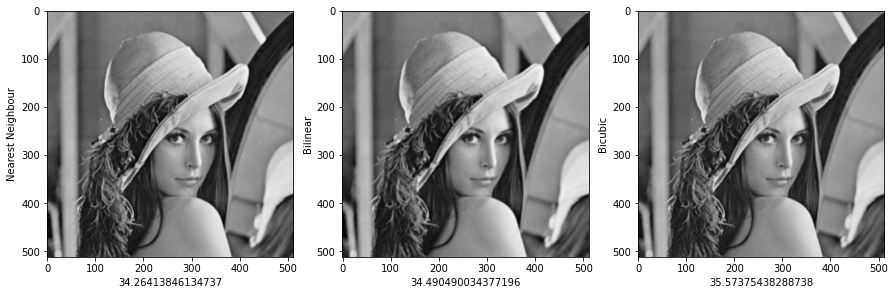

In [14]:
fig = plt.figure(figsize=(15,10))
rows = 1
columns = 3

fig.add_subplot(rows,columns,1)
plt.imshow(fullImgNearest,cmap='gray')
plt.ylabel("Nearest Neighbour")
plt.xlabel(PSNR(fullImgNearest,grayImg))

fig.add_subplot(rows,columns,2)
plt.imshow(fullImgBilinear,cmap='gray')
plt.ylabel("Bilinear")
plt.xlabel(PSNR(fullImgBilinear,grayImg))

fig.add_subplot(rows,columns,3)
plt.imshow(fullImgBicubic,cmap='gray')
plt.ylabel("Bicubic")
plt.xlabel(PSNR(fullImgBicubic,grayImg))

### **Part 2**

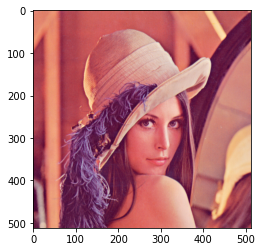

In [15]:
# reading the image using the imread function of the cv2
img = cv2.imread(r"PA1_Images\Lenna.png")
# displaying the image using the imshow function of matplotlib.pyplot
# first converting the image from bgr format to rgb 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [16]:
# ChSwap function to swapped the rgb channels as directed
def ChSwap(img):
    # using the split function of cv2 
    # it splits the image into blue, green and red channels 
    b,g,r = cv2.split(img)
    rOut = b
    gOut = r
    bOut = g
    # returning the new merged image with swapped rgb channels 
    return cv2.merge([bOut,gOut,rOut])

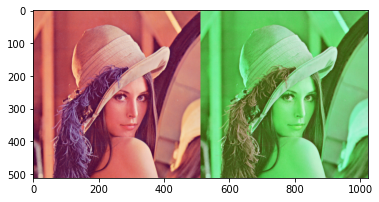

In [29]:
# calling the ChSwap function to swap the channels 
swappedChImg = ChSwap(img)
# displaying the image with swapped channels
result = np.hstack((img,swappedChImg))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

### **Part 3**

In [77]:
# definning the red eye removal function
def RedEyeRemoval(origImg):
    shape=  origImg.shape
    outImg = origImg.copy()

    #first loop for looping over every pixel row in the image
    for i in range(shape[0]):
        #inner loop for looping over every pixel column
        for j in range(shape[1]):

            #img[i][j] will have an array with 3 values [b,g,r]
            #we have to alter these values for changing the color
            if(outImg[i][j][0]>=0 and outImg[i][j][1]>=0 and outImg[i][j][2]>=160
            and outImg[i][j][0]<=220 and outImg[i][j][1]<=100 and outImg[i][j][2]<=255):
                #change color to black
                outImg[i][j]=[0,0,0]

    result = np.hstack((origImg,outImg))
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

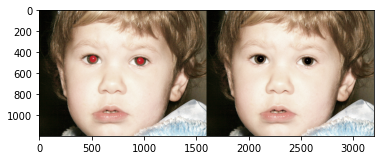

In [68]:
# reading the red eye images
redeye1 = cv2.imread(r"PA1_Images\kidred.jpg",1)
RedEyeRemoval(redeye1)

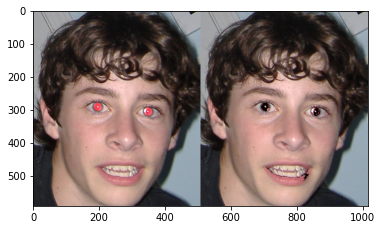

In [44]:
redeye2 = cv2.imread(r"PA1_Images\Red-eye_effect.png",1)
RedEyeRemoval(redeye2)

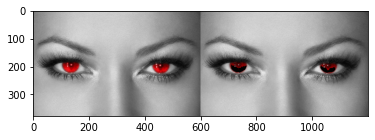

In [45]:
redeye2 = cv2.imread(r"PA1_Images\redeye.jpg",1)
RedEyeRemoval(redeye2)

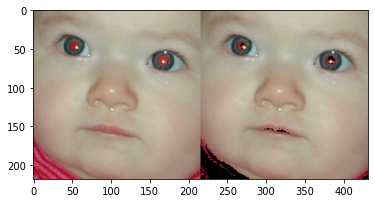

In [46]:
redeye2 = cv2.imread(r"PA1_Images\redeyebaby.jpg",1)
RedEyeRemoval(redeye2)